In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('TrainingData.csv')

In [3]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
wi=lb.fit_transform(np.array(df.loc[:,['Working Ion']]))
cs=lb.fit_transform(np.array(df.loc[:,['Crystal System']]))
sn=lb.fit_transform(np.array(df.loc[:,['Spacegroup Number']]))
el=np.array(df.loc[:,['mean_Number', 'mean_MendeleevNumber',
                       'mean_AtomicWeight', 'mean_MeltingT', 'mean_Column', 'mean_Row',
                       'mean_CovalentRadius', 'mean_Electronegativity', 'mean_NsValence',
                       'mean_NpValence', 'mean_NdValence', 'mean_NfValence', 'mean_NValance',
                       'mean_NsUnfilled', 'mean_NpUnfilled', 'mean_NdUnfilled',
                       'mean_NfUnfilled', 'mean_NUnfilled', 'mean_GSvolume_pa',
                       'mean_GSbandgap', 'mean_GSmagmom', 'mean_SpaceGroupNumber',
                       'dev_Number', 'dev_MendeleevNumber', 'dev_AtomicWeight', 'dev_MeltingT',
                       'dev_Column', 'dev_Row', 'dev_CovalentRadius', 'dev_Electronegativity',
                       'dev_NsValence', 'dev_NpValence', 'dev_NdValence', 'dev_NfValence',
                       'dev_NValance', 'dev_NsUnfilled', 'dev_NpUnfilled', 'dev_NdUnfilled',
                       'dev_NfUnfilled', 'dev_NUnfilled', 'dev_GSvolume_pa', 'dev_GSbandgap',
                       'dev_GSmagmom', 'dev_SpaceGroupNumber', 'mean_Number.1',
                       'mean_MendeleevNumber.1', 'mean_AtomicWeight.1', 'mean_MeltingT.1',
                       'mean_Column.1', 'mean_Row.1', 'mean_CovalentRadius.1',
                       'mean_Electronegativity.1', 'mean_NsValence.1', 'mean_NpValence.1',
                       'mean_NdValence.1', 'mean_NfValence.1', 'mean_NValance.1',
                       'mean_NsUnfilled.1', 'mean_NpUnfilled.1', 'mean_NdUnfilled.1',
                       'mean_NfUnfilled.1', 'mean_NUnfilled.1', 'mean_GSvolume_pa.1',
                       'mean_GSbandgap.1', 'mean_GSmagmom.1', 'mean_SpaceGroupNumber.1',
                       'dev_Number.1', 'dev_MendeleevNumber.1', 'dev_AtomicWeight.1',
                       'dev_MeltingT.1', 'dev_Column.1', 'dev_Row.1', 'dev_CovalentRadius.1',
                       'dev_Electronegativity.1', 'dev_NsValence.1', 'dev_NpValence.1',
                       'dev_NdValence.1', 'dev_NfValence.1', 'dev_NValance.1',
                       'dev_NsUnfilled.1', 'dev_NpUnfilled.1', 'dev_NdUnfilled.1',
                       'dev_NfUnfilled.1', 'dev_NUnfilled.1', 'dev_GSvolume_pa.1',
                       'dev_GSbandgap.1', 'dev_GSmagmom.1', 'dev_SpaceGroupNumber.1']])
prop=np.hstack((wi, cs, sn, el))

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
pss = ss.fit_transform(prop)

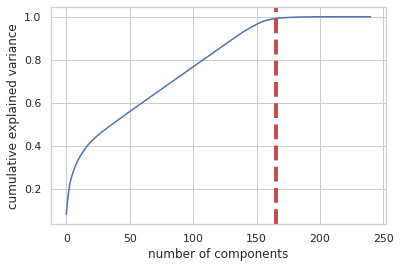

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.079959,0.079959
1,0.144317,0.064357
2,0.192252,0.047935
3,0.226260,0.034008
4,0.251980,0.025720
...,...,...
160,0.986414,0.001286
161,0.987626,0.001212
162,0.988762,0.001136
163,0.989760,0.000998


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

pca_test = PCA(n_components=241)
pca_test.fit(pss)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=165, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(165))

In [5]:
pca = PCA(n_components=165)
newdata=pca.fit_transform(pss)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

newdf = pd.DataFrame(newdata)
newdf.to_csv('NEWTrainingData.csv')

[0.07995948 0.06435749 0.04793504 0.03400778 0.02571976 0.01859614
 0.0176754  0.01458718 0.01406416 0.01320829 0.01085392 0.01041588
 0.00944084 0.00899432 0.00877185 0.00842921 0.00806387 0.00729785
 0.00710531 0.00672411 0.00593953 0.00551626 0.00544893 0.00534566
 0.00514704 0.00505877 0.00496736 0.00486044 0.00483348 0.0045926
 0.00453437 0.00449595 0.00446278 0.00440016 0.00437404 0.00436213
 0.00432113 0.00430556 0.00429897 0.00428577 0.00427358 0.00426594
 0.0042531  0.00424666 0.00424501 0.00423912 0.00423413 0.00422906
 0.00422696 0.0042252  0.00422069 0.00421536 0.0042117  0.00420542
 0.00420349 0.0041992  0.00419563 0.00419433 0.00419034 0.00418796
 0.00418551 0.00418167 0.00417975 0.00417796 0.00417663 0.00417459
 0.00417409 0.00417208 0.00417087 0.00416941 0.00416927 0.00416717
 0.00416653 0.00416612 0.00416488 0.00416366 0.00416323 0.00416309
 0.00416261 0.00416152 0.00416124 0.00416096 0.0041604  0.0041594
 0.00415882 0.00415818 0.00415784 0.00415763 0.00415737 0.004156

In [6]:
ndf=pd.read_csv('NEWTrainingData.csv')
ndf.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,155,156,157,158,159,160,161,162,163,164
0,0,2.208607,5.182065,-3.981167,-0.975127,1.335366,2.549047,-1.754657,2.375499,-1.729059,...,0.078436,0.410686,0.072082,-1.009589,-0.374627,0.442292,0.455574,0.631821,0.423534,-0.064654
1,1,-1.804395,5.971141,-1.019981,-0.152070,1.744385,1.979443,-0.986468,1.600636,-1.655267,...,0.159933,0.617506,-0.338813,-0.579354,-0.259728,0.040798,0.113058,0.541549,0.075114,-0.270060
2,2,-3.791772,6.487141,0.660940,0.412992,2.277647,1.744390,-0.560478,1.136384,-1.681868,...,-0.501148,-0.782004,0.554446,0.231389,0.202266,-0.000323,-0.008255,-0.192702,0.062480,0.100206
3,3,-2.034026,4.885303,-0.464518,-0.441795,1.588371,1.785487,-0.757702,1.690954,-1.616136,...,0.076953,0.678045,-0.192914,-0.358424,0.187675,0.398462,0.052402,0.303315,-0.108808,0.235048
4,4,-2.124927,4.955902,-0.351355,-0.435077,1.818133,1.979858,-0.655733,1.424823,-1.889610,...,0.074421,0.058828,-0.042249,-0.585983,0.075743,0.335382,0.292800,0.167502,-0.130382,0.247379
5,5,-4.695387,5.809540,1.340648,0.342888,1.819208,1.399099,0.028864,1.074380,-1.302051,...,0.085541,0.790629,-0.607867,-0.353899,-0.430378,0.007178,0.142032,0.433348,-0.277543,-0.281583
6,6,-4.731678,6.212094,1.571774,0.398802,2.033595,1.694938,0.266738,0.375775,-1.102954,...,0.198332,0.340807,-0.012501,-0.574812,-0.611788,-0.025726,0.368659,0.615304,-0.064363,-0.318098
7,7,-4.551861,5.841568,1.413363,0.288861,2.029433,1.717986,0.065368,0.706136,-1.566010,...,0.199892,0.080224,-0.160481,-0.549388,-0.236602,-0.080044,0.274133,0.284314,-0.333816,-0.199273
8,8,-4.440265,5.702848,1.306087,0.414726,1.710171,1.558393,-0.045992,0.489521,-1.508290,...,0.386958,1.080425,-0.755945,-0.058195,-0.306560,-0.001071,-0.117411,0.594317,-0.330991,-0.172486
9,9,-4.622294,6.069609,1.458713,0.333358,1.940190,1.673777,0.035585,0.441687,-1.447108,...,0.152073,0.529222,0.070361,-0.749565,-0.308179,-0.015541,0.583657,0.478941,-0.313339,-0.223323
